In [52]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly
import random

from scipy.stats import linregress

In [66]:
#import merge_city_pop_greater_than_200k.csv
pop_200_df = pd.read_csv("merge_city_pop_greater_than_200k.csv")
pop_200_df.head()


,Unnamed: 0,2012 Median Age,2012 Total Population,2012 Poverty Count,2012 Median Household Income,2012 Employed,2012 Unemployed,2012 Monthly Rent,2012 Owner Monthly Costs,"City, State",...,Monthly Rent Growth Rate (2015 to 2016),Owner Monthly Costs Growth Rate (2015 to 2016),5-Year Average Population Growth Rate,5-Year Average Age Growth Rate,5-Year Average Poverty Count Growth Rate,5-Year Average Median Household Income Growth Rate,5-Year Average Employed Growth Rate,5-Year Average Unemployed Growth Rate,5-Year Average Monthly Rent Growth Rate,5-Year Average Owner Monthly Costs Growth Rate
0,1003,33.325000,247294.0,18567.0,91518.500000,116773.0,8256.0,1216.000000,1830.000000,"Katy, TX",...,0.035921,0.022718,5.924817,0.632505,2.458720,1.698790,6.507591,2.387433,2.489258,0.071222
1,2252,34.100000,214291.0,23481.0,89558.666667,106513.0,7767.0,1785.222222,2943.222222,"Irvine, CA",...,0.049831,0.028050,3.699406,0.376676,6.953642,0.198074,3.058651,0.897965,2.459216,-1.015132
2,2383,35.200000,232075.0,40192.0,46162.571429,103111.0,14767.0,1112.428571,1576.142857,"Kissimmee, FL",...,0.019949,0.006082,3.552188,0.383692,7.990001,-0.120192,2.888022,-6.789064,0.613190,-3.393180
3,2939,36.025000,323197.0,19946.0,90619.375000,159809.0,9502.0,1217.125000,1838.875000,"Spring, TX",...,0.040925,0.011892,3.010138,0.493035,2.651771,1.505416,2.607840,-4.213583,3.375424,0.448610
4,3474,35.863158,379926.0,94325.0,37954.368421,172510.0,21285.0,900.052632,1607.578947,"New Orleans, LA",...,0.012929,0.013250,2.606485,0.556808,1.782645,1.853025,3.083344,-1.498844,1.206043,0.413636


In [7]:
#pop_200_df.columns

R^2=0.8528, P-Value=5.387046512582897e-47, Std. Error=0.0373


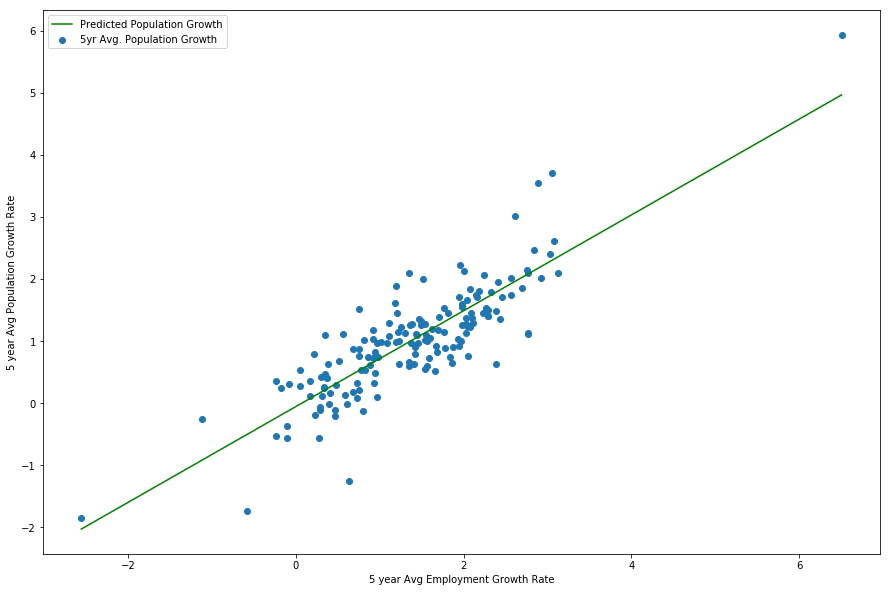

In [94]:
# 5-yr Avg Employment growth rate vs 5-yr Avg Population growth rate

#(slope, intercept, rval, pval, stderr) = linregress(pop_200_split_df['Total Population'], pop_200_split_df['Monthly Rent'])
(slope, intercept, rval, pval, stderr) = linregress(pop_200_df['5-Year Average Employed Growth Rate']
                                                    , pop_200_df['5-Year Average Population Growth Rate'])

#print(f'Prediction(x) = {slope:0.4f} * x + {intercept:0.4f}')

#pop_200_split_df['P_pop_Rent'] = slope * pop_200_split_df['Total Population'] + intercept
pop_200_df['P_pop_growth_based_Empl'] = slope * pop_200_df['5-Year Average Employed Growth Rate'] + intercept
print(f"R^2={round(rval,4)}, P-Value={pval}, Std. Error={round(stderr,4)}")



plt.figure(figsize=(15,10))

#pop_200_split_df.plot('Total Population', 'P_pop_Rent', kind = 'scatter')
plt.scatter(pop_200_df['5-Year Average Employed Growth Rate']
         , pop_200_df['5-Year Average Population Growth Rate']
         )

plt.plot(pop_200_df['5-Year Average Employed Growth Rate'] 
         , pop_200_df['P_pop_growth_based_Empl']
         , color='green'
       #, label="Predicted population growth"
       )

plt.xlabel("5 year Avg Employment Growth Rate", fontsize=15)
plt.ylabel("5 year Avg Population Growth Rate", fontsize=15)

plt.legend(['Predicted Population Growth', '5yr Avg. Population Growth'],loc='best', fontsize=12)


plt.savefig("Images/LinRegress_Empl_Grwth_Vs_Pop_Grwth.png")


R^2=0.2557, P-Value=0.0010220602260412395, Std. Error=0.0603


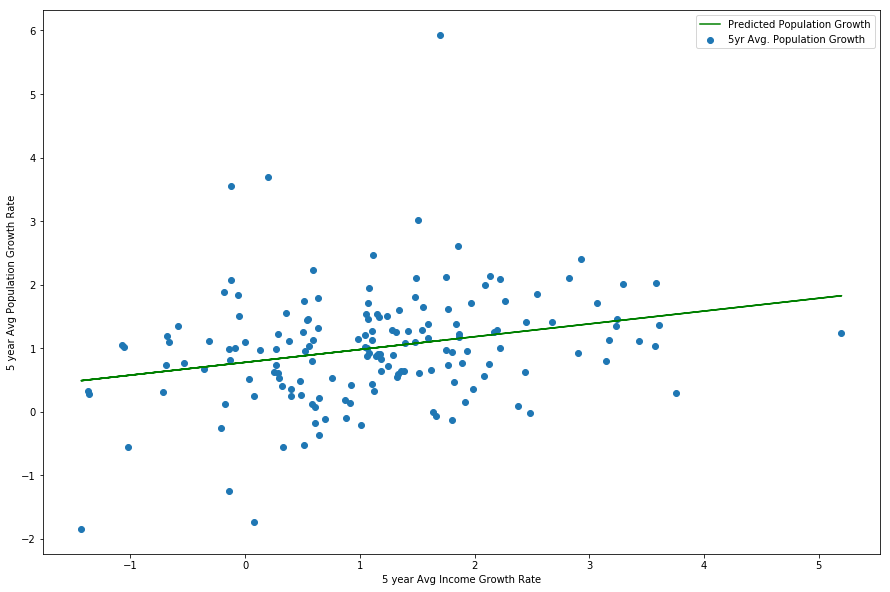

In [95]:
# 5-yr Avg Income growth rate vs 5-yr Avg Population growth rate

#(slope, intercept, rval, pval, stderr) = linregress(pop_200_split_df['Total Population'], pop_200_split_df['Monthly Rent'])
(slope, intercept, rval, pval, stderr) = linregress(pop_200_df['5-Year Average Median Household Income Growth Rate']
                                                    , pop_200_df['5-Year Average Population Growth Rate'])

#print(f'Prediction(x) = {slope:0.4f} * x + {intercept:0.4f}')

#pop_200_split_df['P_pop_Rent'] = slope * pop_200_split_df['Total Population'] + intercept
pop_200_df['P_pop_growth_based_Incm'] = slope * pop_200_df['5-Year Average Median Household Income Growth Rate'] + intercept
print(f"R^2={round(rval,4)}, P-Value={pval}, Std. Error={round(stderr,4)}")



plt.figure(figsize=(15,10))

#pop_200_split_df.plot('Total Population', 'P_pop_Rent', kind = 'scatter')
plt.scatter(pop_200_df['5-Year Average Median Household Income Growth Rate']
         , pop_200_df['5-Year Average Population Growth Rate']
         )

plt.plot(pop_200_df['5-Year Average Median Household Income Growth Rate'] 
         , pop_200_df['P_pop_growth_based_Incm']
         , color='green'
       #, label="Predicted population growth"
       )

plt.xlabel("5 year Avg Income Growth Rate", fontsize=15)
plt.ylabel("5 year Avg Population Growth Rate", fontsize=15)

plt.legend(['Predicted Population Growth', '5yr Avg. Population Growth'],loc='best',  fontsize=12)


plt.savefig("Images/LinRegress_Incme_Grwth_Vs_Pop_Grwth.png")



R^2=0.3385, P-Value=1.0509281923476045e-05, Std. Error=0.0555


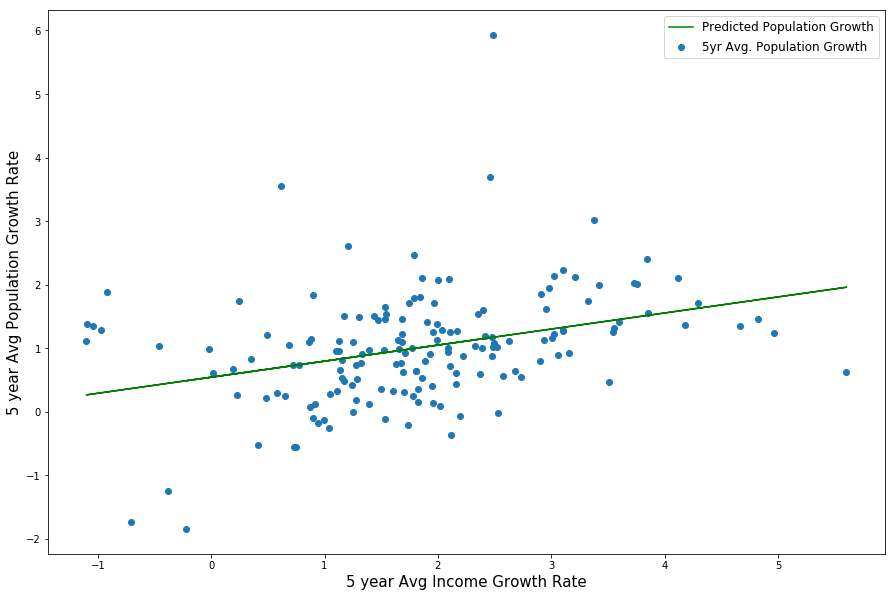

In [99]:
# 5-yr Avg Rent growth rate vs 5-yr Avg Population growth rate

#(slope, intercept, rval, pval, stderr) = linregress(pop_200_split_df['Total Population'], pop_200_split_df['Monthly Rent'])
(slope, intercept, rval, pval, stderr) = linregress(pop_200_df['5-Year Average Monthly Rent Growth Rate']
                                                    , pop_200_df['5-Year Average Population Growth Rate'])

#print(f'Prediction(x) = {slope:0.4f} * x + {intercept:0.4f}')

#pop_200_split_df['P_pop_Rent'] = slope * pop_200_split_df['Total Population'] + intercept
pop_200_df['P_pop_growth_based_Rent'] = slope * pop_200_df['5-Year Average Monthly Rent Growth Rate'] + intercept
print(f"R^2={round(rval,4)}, P-Value={pval}, Std. Error={round(stderr,4)}")



plt.figure(figsize=(15,10))

#pop_200_split_df.plot('Total Population', 'P_pop_Rent', kind = 'scatter')
plt.scatter(pop_200_df['5-Year Average Monthly Rent Growth Rate']
         , pop_200_df['5-Year Average Population Growth Rate']
         )

plt.plot(pop_200_df['5-Year Average Monthly Rent Growth Rate'] 
         , pop_200_df['P_pop_growth_based_Rent']
         , color='green'
       #, label="Predicted population growth"
       )

plt.xlabel("5 year Avg Income Growth Rate", fontsize=15)
plt.ylabel("5 year Avg Population Growth Rate", fontsize=15)

plt.legend(['Predicted Population Growth', '5yr Avg. Population Growth'],loc='best', fontsize=12)


plt.savefig("Images/LinRegress_Rent_Grwth_Vs_Pop_Grwth.png")




R^2=0.0028, P-Value=0.9719784843847126, Std. Error=0.0543


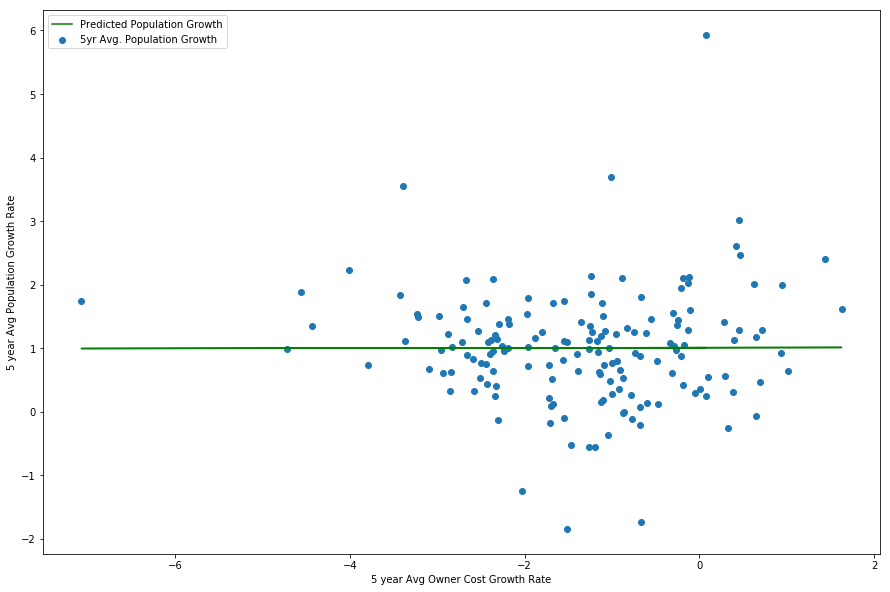

In [97]:
# 5-yr Avg Rent growth rate vs 5-yr Avg Population growth rate

#(slope, intercept, rval, pval, stderr) = linregress(pop_200_split_df['Total Population'], pop_200_split_df['Monthly Rent'])
(slope, intercept, rval, pval, stderr) = linregress(pop_200_df['5-Year Average Owner Monthly Costs Growth Rate']
                                                    , pop_200_df['5-Year Average Population Growth Rate'])

#print(f'Prediction(x) = {slope:0.4f} * x + {intercept:0.4f}')

#pop_200_split_df['P_pop_Rent'] = slope * pop_200_split_df['Total Population'] + intercept
pop_200_df['P_pop_growth_based_OwnerCost'] = slope * pop_200_df['5-Year Average Owner Monthly Costs Growth Rate'] + intercept
print(f"R^2={round(rval,4)}, P-Value={pval}, Std. Error={round(stderr,4)}")



plt.figure(figsize=(15,10))

#pop_200_split_df.plot('Total Population', 'P_pop_Rent', kind = 'scatter')
plt.scatter(pop_200_df['5-Year Average Owner Monthly Costs Growth Rate']
         , pop_200_df['5-Year Average Population Growth Rate']
         )

plt.plot(pop_200_df['5-Year Average Owner Monthly Costs Growth Rate'] 
         , pop_200_df['P_pop_growth_based_OwnerCost']
         , color='green'
       #, label="Predicted population growth"
       )

plt.xlabel("5 year Avg Owner Cost Growth Rate", fontsize=15)
plt.ylabel("5 year Avg Population Growth Rate", fontsize=15)

plt.legend(['Predicted Population Growth', '5yr Avg. Population Growth'],loc='best', fontsize=12)

plt.savefig("Images/LinRegress_OwnerCost_Grwth_Vs_Pop_Grwth.png")

